# インポート

In [45]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# データの全体感

In [4]:
df = pd.read_csv("last_biccamera.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_url     2552 non-null   object 
 1   title        2552 non-null   object 
 2   picture      2552 non-null   object 
 3   maker        2552 non-null   object 
 4   price        2552 non-null   object 
 5   point        2552 non-null   object 
 6   stock        2552 non-null   object 
 7   ratings      2552 non-null   object 
 8   terms        2552 non-null   object 
 9   spec_list    2552 non-null   object 
 10  model_date   1925 non-null   object 
 11  memory       2552 non-null   int64  
 12  hdd          2552 non-null   int64  
 13  ssd          2552 non-null   int64  
 14  emmc         2552 non-null   int64  
 15  intel_cpu    2552 non-null   object 
 16  amd_cpu      131 non-null    object 
 17  float_inch   2494 non-null   float64
 18  int_inch     2552 non-null   float64
 19  new_ma

In [6]:
df.head()

,item_url,title,picture,maker,price,point,stock,ratings,terms,spec_list,...,intel_cpu,amd_cpu,float_inch,int_inch,new_maker,new_price,new_point,new_ratings,string_len,words_len
0,https://www.biccamera.com/bc/item/7309753/,FMVA42D3B ノートパソコン LIFEBOOK（ライフブック） AH42/D3 ブライ...,https://image.biccamera.com/img/00000007309753...,富士通 FUJITSU,"148,280円（税込）","14,828ポイント\n （10％）",予約受付中,0,no ship info,"['SSD256GB', '2019年10月モデル', '15.6型', 'intelCel...",...,celeron,NaN,15.6,15.0,FUJITSU,148280,14828,0,107,11
1,https://www.biccamera.com/bc/item/7309754/,FMVAXD3B ノートパソコン LIFEBOOK（ライフブック）AH-X/D3 ブライトブ...,https://image.biccamera.com/img/00000007309754...,富士通 FUJITSU,"274,780円（税込）","27,478ポイント\n （10％）",予約受付中,0,no ship info,"['2019年10月モデル', '15.6型', 'SSD1TB', 'メモリ8GB', '...",...,corei7,NaN,15.6,15.0,FUJITSU,274780,27478,0,103,11
2,https://www.biccamera.com/bc/item/7309751/,FMVA42D3W ノートパソコン LIFEBOOK（ライフブック） AH42/D3 プレミ...,https://image.biccamera.com/img/00000007309751...,富士通 FUJITSU,"148,280円（税込）","14,828ポイント\n （10％）",予約受付中,0,no ship info,"['SSD256GB', '2019年10月モデル', '15.6型', 'intelCel...",...,celeron,NaN,15.6,15.0,FUJITSU,148280,14828,0,108,11
3,https://www.biccamera.com/bc/item/6233915/,ノートパソコン [14.0型 /AMD Eシリーズ /eMMC：32GB /メモリ：4GB ...,https://image.biccamera.com/img/00000006233915...,ASUS エイスース,"19,800円（税込）",198ポイント\n,在庫あり,(82)\n,2019年11月4日月曜日にお届け,"['AMDEシリーズ', 'eMMC32GB', '2018年12月', 'メモリ4GB',...",...,0,AMDEシリーズ,14.0,14.0,ASUS,19800,198,82,56,7
4,https://www.biccamera.com/bc/item/7237832/,8MD65PA-AAAA ノートパソコン Chromebook x360 12b-ca000...,https://image.biccamera.com/img/00000007237832...,HP ヒューレット・パッカード,"54,700円（税込）","5,470ポイント\n （10％）",在庫あり,(3)\n,no ship info,"['2019年10月モデル', 'eMMC64GB', 'intelPentium', '1...",...,pentium,NaN,12.0,12.0,HP,54700,5470,3,115,12


In [9]:
len(df)

2552

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
memory,2552.0,7.793887,5.306431,0.0,4.0,8.0,8.00,64.0
hdd,2552.0,333.342476,461.753933,0.0,0.0,0.0,1000.00,2000.0
ssd,2552.0,196.611285,212.268417,0.0,0.0,128.0,256.00,1500.0
emmc,2552.0,4.520376,18.696496,0.0,0.0,0.0,0.00,128.0
float_inch,2494.0,14.199238,1.769264,4.5,13.3,15.0,15.60,18.4
int_inch,2552.0,13.472179,2.631268,0.0,13.0,14.0,15.00,18.0
new_price,2552.0,140653.926724,81876.840466,16280.0,83360.0,121946.0,181269.00,999860.0
new_point,2552.0,4450.367555,8586.156677,0.0,0.0,0.0,4306.25,99986.0
new_ratings,2552.0,2.528213,7.655048,0.0,0.0,1.0,2.00,246.0
string_len,2552.0,97.847571,15.946988,7.0,92.0,99.0,105.00,188.0


# ヒストグラム

In [24]:
def sturges_rule(n):
    return round(1+math.log2(n))

## 値段

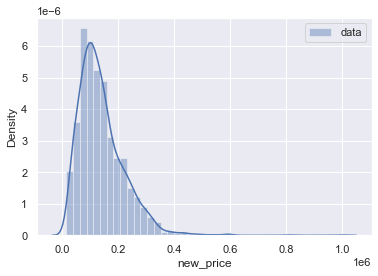

In [15]:
sns.distplot(
    df.new_price, bins=41, label="data", 
)
plt.legend()
plt.show()

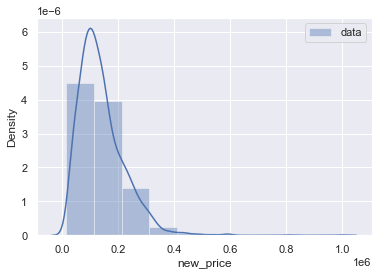

In [17]:
sns.distplot(
    df.new_price, bins=10, label="data", 
)
plt.legend()
plt.show()

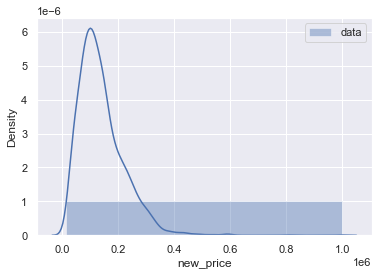

In [16]:
sns.distplot(
    df.new_price, bins=1, label="data", 
)
plt.legend()
plt.show()

In [20]:
bins = sturges_rule(len(df))
bins

12

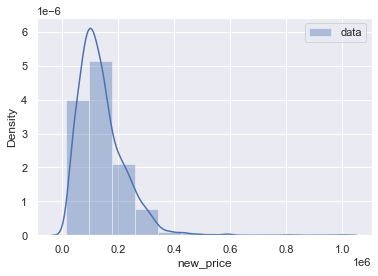

In [21]:
sns.distplot(
    df.new_price, bins=bins, label="data", 
)
plt.legend()
plt.show()

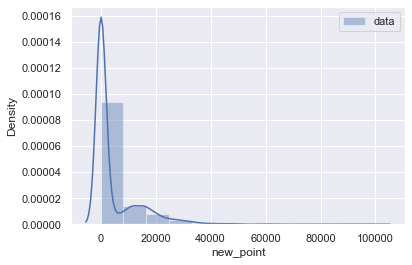

In [22]:
sns.distplot(
    df.new_point, bins=bins, label="data", 
)
plt.legend()
plt.show()

## ポイント

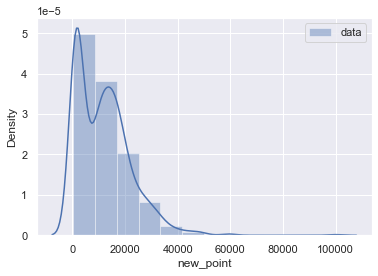

In [23]:
sns.distplot(
    df[df.new_point != 0].new_point, bins=bins, label="data", 
)
plt.legend()
plt.show()

## string_len

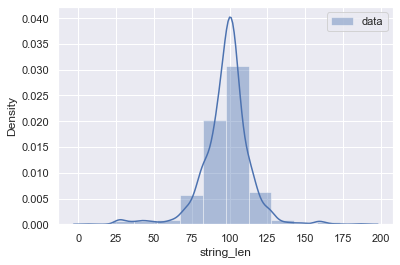

In [28]:
sns.distplot(
    df.string_len, bins=bins, label="data", 
)
plt.legend()
plt.show()

In [29]:
#歪度と尖度を計算
print("歪度: %f" % df.string_len.skew())
print("尖度: %f" % df.string_len.kurt())

歪度: -0.685047
尖度: 5.714244


## words_len

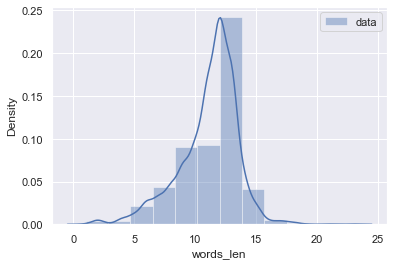

In [31]:
sns.distplot(
    df.words_len, bins=bins, label="data", 
)
plt.legend()
plt.show()

## インチ

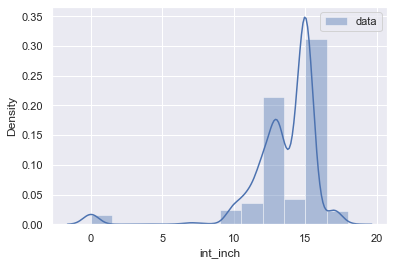

In [33]:
sns.distplot(
    df.int_inch.fillna(0), bins=bins, label="data", 
)
plt.legend()
plt.show()

# 散布図

相関関係を把握する  
外れ値を把握する

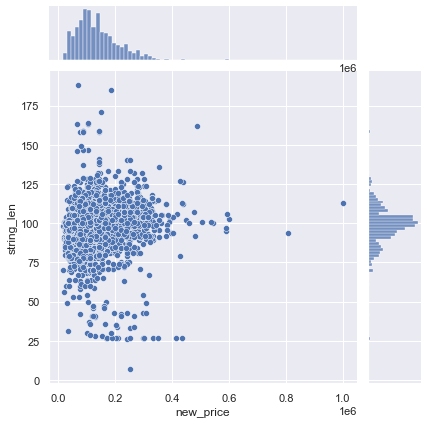

In [34]:
sns.jointplot(x="new_price", y="string_len", data=df)

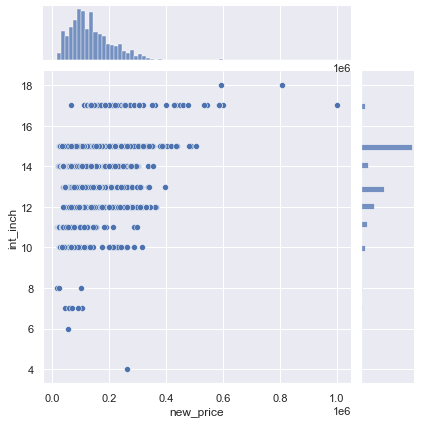

In [36]:
sns.jointplot(x="new_price", y="int_inch", data=df[df.int_inch > 0])

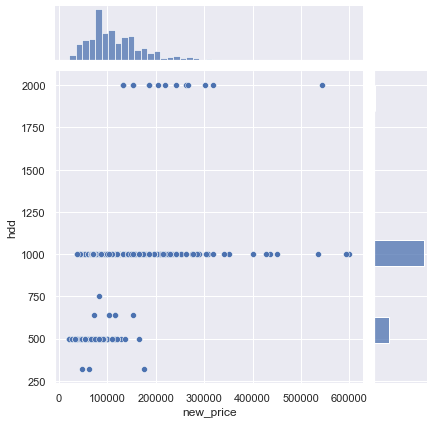

In [37]:
sns.jointplot(x="new_price", y="hdd", data=df[df.hdd > 0])



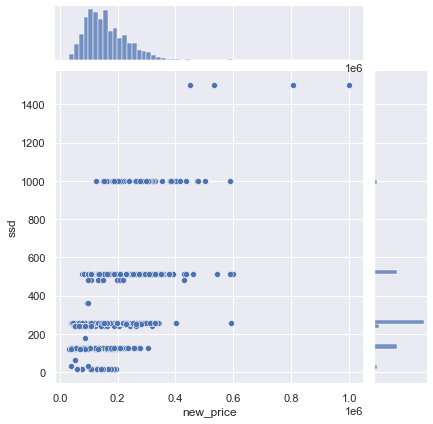

In [38]:
sns.jointplot(x="new_price", y="ssd", data=df[df.ssd > 0])



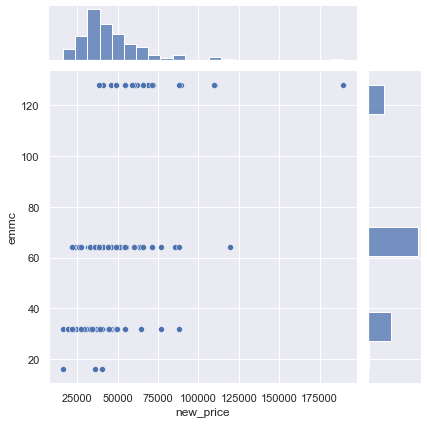

In [39]:
sns.jointplot(x="new_price", y="emmc", data=df[df.emmc > 0])



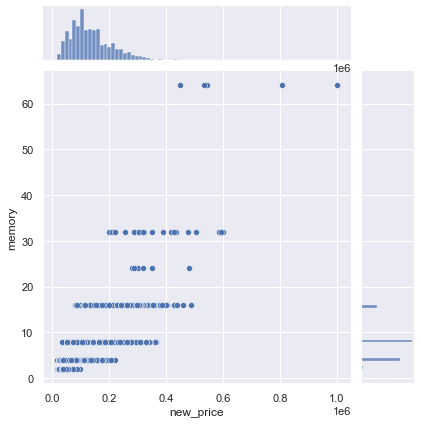

In [40]:
sns.jointplot(x="new_price", y="memory", data=df[df.memory > 0])



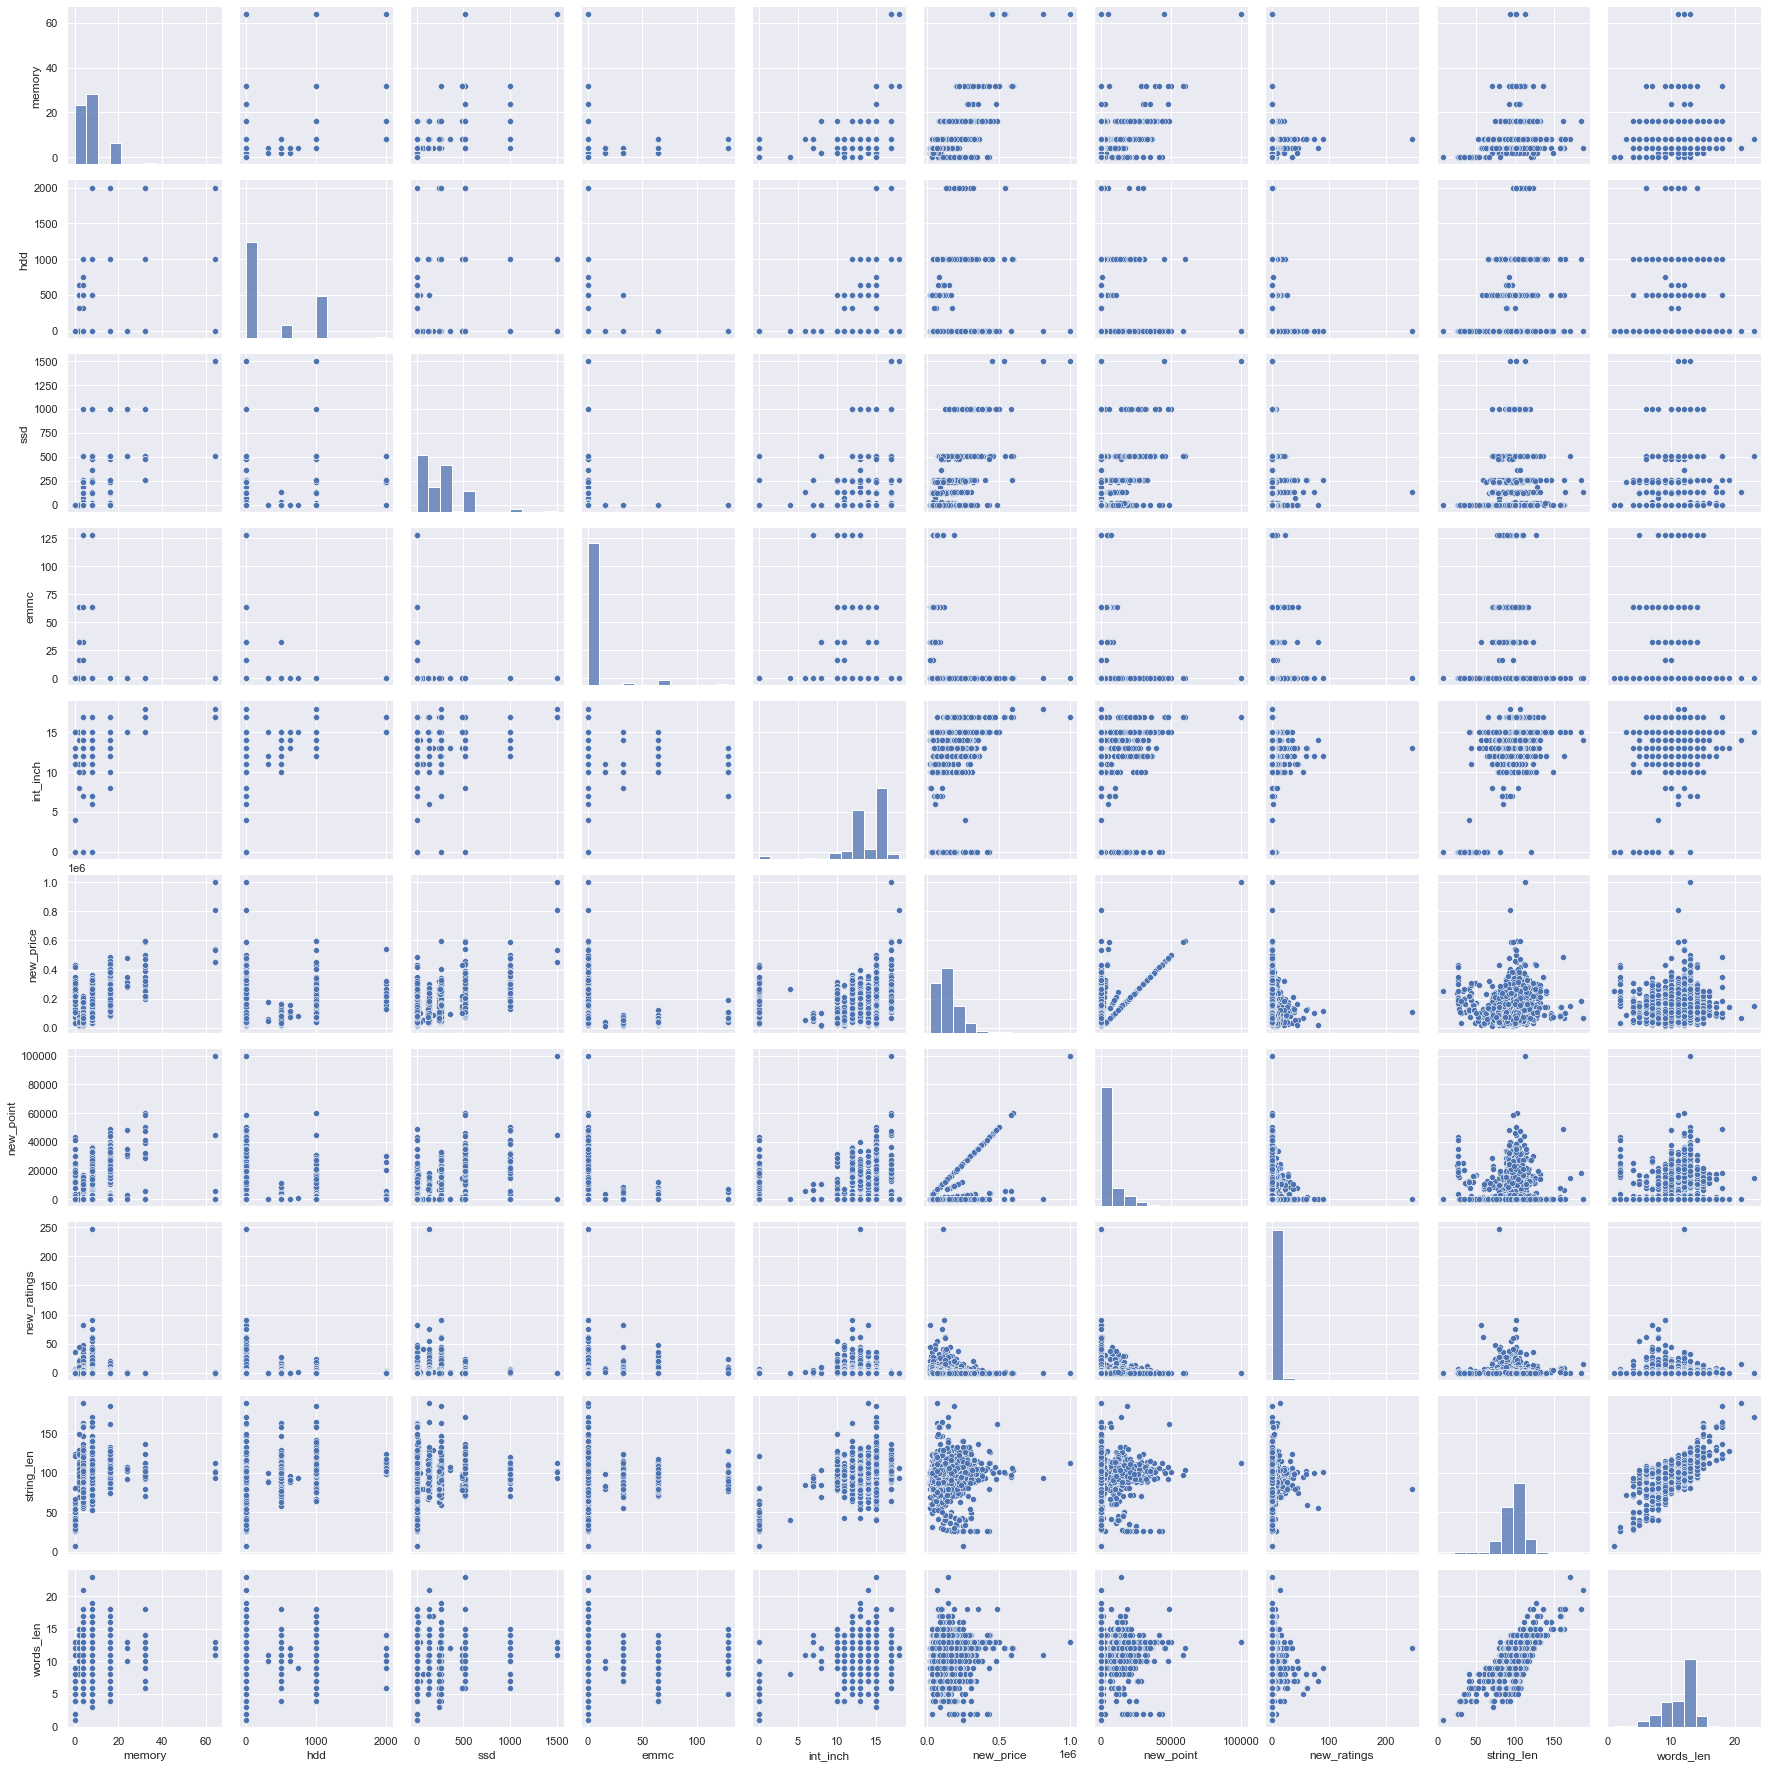

In [42]:
sns.pairplot(df[[ 'memory', 'hdd', 'ssd','emmc','int_inch',
       'new_price', 'new_point', 'new_ratings', 'string_len', 'words_len']], diag_kws=dict(bins=bins))



<AxesSubplot:>

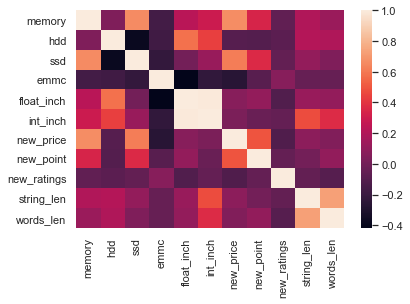

In [43]:
#相関係数のヒートマップ
corr_tr = df.corr()
corr_tr = pd.DataFrame(corr_tr)
sns.heatmap(corr_tr)

In [46]:
#目的変数と高い相関を持つ特徴量を確認
high_corr = corr_tr[np.abs(corr_tr['new_price']) > 0.5]['new_price']
high_corr

memory       0.665786
ssd          0.612855
new_price    1.000000
Name: new_price, dtype: float64

In [47]:
#目的変数と高い相関を持つ特徴量を確認
low_corr = corr_tr[np.abs(corr_tr['new_price']) > 0.3]['new_price']
low_corr

memory       0.665786
ssd          0.612855
new_price    1.000000
new_point    0.491502
Name: new_price, dtype: float64

# 軸ごとで見てみる

In [48]:
df.head()

,item_url,title,picture,maker,price,point,stock,ratings,terms,spec_list,...,intel_cpu,amd_cpu,float_inch,int_inch,new_maker,new_price,new_point,new_ratings,string_len,words_len
0,https://www.biccamera.com/bc/item/7309753/,FMVA42D3B ノートパソコン LIFEBOOK（ライフブック） AH42/D3 ブライ...,https://image.biccamera.com/img/00000007309753...,富士通 FUJITSU,"148,280円（税込）","14,828ポイント\n （10％）",予約受付中,0,no ship info,"['SSD256GB', '2019年10月モデル', '15.6型', 'intelCel...",...,celeron,NaN,15.6,15.0,FUJITSU,148280,14828,0,107,11
1,https://www.biccamera.com/bc/item/7309754/,FMVAXD3B ノートパソコン LIFEBOOK（ライフブック）AH-X/D3 ブライトブ...,https://image.biccamera.com/img/00000007309754...,富士通 FUJITSU,"274,780円（税込）","27,478ポイント\n （10％）",予約受付中,0,no ship info,"['2019年10月モデル', '15.6型', 'SSD1TB', 'メモリ8GB', '...",...,corei7,NaN,15.6,15.0,FUJITSU,274780,27478,0,103,11
2,https://www.biccamera.com/bc/item/7309751/,FMVA42D3W ノートパソコン LIFEBOOK（ライフブック） AH42/D3 プレミ...,https://image.biccamera.com/img/00000007309751...,富士通 FUJITSU,"148,280円（税込）","14,828ポイント\n （10％）",予約受付中,0,no ship info,"['SSD256GB', '2019年10月モデル', '15.6型', 'intelCel...",...,celeron,NaN,15.6,15.0,FUJITSU,148280,14828,0,108,11
3,https://www.biccamera.com/bc/item/6233915/,ノートパソコン [14.0型 /AMD Eシリーズ /eMMC：32GB /メモリ：4GB ...,https://image.biccamera.com/img/00000006233915...,ASUS エイスース,"19,800円（税込）",198ポイント\n,在庫あり,(82)\n,2019年11月4日月曜日にお届け,"['AMDEシリーズ', 'eMMC32GB', '2018年12月', 'メモリ4GB',...",...,0,AMDEシリーズ,14.0,14.0,ASUS,19800,198,82,56,7
4,https://www.biccamera.com/bc/item/7237832/,8MD65PA-AAAA ノートパソコン Chromebook x360 12b-ca000...,https://image.biccamera.com/img/00000007237832...,HP ヒューレット・パッカード,"54,700円（税込）","5,470ポイント\n （10％）",在庫あり,(3)\n,no ship info,"['2019年10月モデル', 'eMMC64GB', 'intelPentium', '1...",...,pentium,NaN,12.0,12.0,HP,54700,5470,3,115,12


In [49]:
df.nunique()

item_url       2552
title          2544
picture        2552
maker            30
price           887
point           537
stock             8
ratings          50
terms             3
spec_list      1528
model_date      101
memory            8
hdd               7
ssd              15
emmc              5
intel_cpu        11
amd_cpu          10
float_inch       30
int_inch         13
new_maker        30
new_price       887
new_point       537
new_ratings      50
string_len      114
words_len        21
dtype: int64

In [51]:
df.new_maker.value_counts()

NEC                       282
ASUS                      233
Lenovo                    232
MouseComputer             231
HP                        191
Panasonic                 190
FUJITSU                   152
Microsoft                 150
DELL                      145
dynabook                  137
ACER                      135
Apple                     119
VAIO                       79
MSI                        73
TOSHIBA                    66
ＬＧ                         31
RAZER                      30
SONY                       21
HUAWEI                     19
KEIAN                       8
ＧＰＤ                         7
One-Netbook Technology      6
GIGABYTE                    4
ビックカメラ限定セット                 3
サードウェーブ                     2
Asahi Electronics           2
TAGlabel by amadana         1
SAMSUNG                     1
KING JIM                    1
Y！Mobile                    1
Name: new_maker, dtype: int64

In [53]:
(df.new_maker.value_counts()/len(df)).cumsum().reset_index()

,index,new_maker
0,NEC,0.110502
1,ASUS,0.201803
2,Lenovo,0.292712
3,MouseComputer,0.383229
4,HP,0.458072
5,Panasonic,0.532524
6,FUJITSU,0.592085
7,Microsoft,0.650862
8,DELL,0.707680
9,dynabook,0.761364


In [50]:
maker_df = (df.new_maker.value_counts()/len(df)).cumsum().reset_index()
maker_df = maker_df[maker_df.new_maker <= 0.93]
makers = "|".join(list(maker_df["index"]))

In [55]:
makers

'NEC|ASUS|Lenovo|MouseComputer|HP|Panasonic|FUJITSU|Microsoft|DELL|dynabook|ACER|Apple|VAIO|MSI'

In [57]:
len(df[df.new_maker.str.contains(makers)])

2349

In [58]:
# df[df.new_maker.str.contains(makers)]

## 集約関数

In [62]:
rating_df = df.groupby("new_maker").agg({"new_ratings": ["sum", "mean", "median", "count", "max"]}).reset_index()\
    .sort_values(("new_ratings", "sum"), ascending=False)
rating_df

new_maker new_ratings                             
                                   sum       mean median count  max
2                    Apple        1163   9.773109    5.0   119  246
13               Microsoft        1105   7.366667    2.0   150   90
1                     ASUS        1055   4.527897    1.0   233   82
25                dynabook         537   3.919708    2.0   137   28
15                     NEC         490   1.737589    1.0   282   33
7                       HP         373   1.952880    1.0   191   20
11                  Lenovo         354   1.525862    1.0   232   21
5                  FUJITSU         265   1.743421    1.0   152   12
0                     ACER         214   1.585185    1.0   135   15
4                     DELL         161   1.110345    0.0   145   10
14           MouseComputer         149   0.645022    0.0   231   10
17               Panasonic         128   0.673684    0.0   190    5
23                    VAIO          94   1.189873    0.0    79   25
3        Asahi Electronics          88  44.000000   44.0     2   47
12                     MSI          63   0.863014    0.0    73   10
22                 TOSHIBA          62   0.939394    0.0    66    8
8                   HUAWEI          53   2.789474    2.0    19   12
29                      ＬＧ          39   1.258065    1.0    31    7
21     TAGlabel by amadana          16  16.000000   16.0     1   16
28                     ＧＰＤ          14   2.000000    2.0     7    5
18                   RAZER          12   0.400000    0.0    30    3
10                KING JIM          10  10.000000   10.0     1   10
24                Y！Mobile           5   5.000000    5.0     1    5
16  One-Netbook Technology           2   0.333333    0.0     6    1
26                 サードウェーブ           0   0.000000    0.0     2    0
27             ビックカメラ限定セット           0   0.000000    0.0     3    0
9                    KEIAN           0   0.000000    0.0     8    0
20                    SONY           0   0.000000    0.0    21    0
6                 GIGABYTE           0   0.000000    0.0     4    0
19                 SAMSUNG           0   0.000000    0.0     1    0

In [66]:
df[df.new_ratings >= 240]

,item_url,title,picture,maker,price,point,stock,ratings,terms,spec_list,...,intel_cpu,amd_cpu,float_inch,int_inch,new_maker,new_price,new_point,new_ratings,string_len,words_len
971,https://www.biccamera.com/bc/item/3668949/,MacBook Air 13インチモデル [2017年 /SSD 128GB/ メモリ 8G...,https://image.biccamera.com/img/00000003668949...,アップル Apple,"108,670円（税込）",0,販売を終了しました（生産完了）,(246)\n,no ship info,"['2017年', 'SSD128GB', '13インチ', '1.8GHzデュアルコアCo...",...,corei5,NaN,13.0,13.0,Apple,108670,0,246,79,12


In [67]:
rating_df.columns

MultiIndex([(  'new_maker',       ''),
            ('new_ratings',    'sum'),
            ('new_ratings',   'mean'),
            ('new_ratings', 'median'),
            ('new_ratings',  'count'),
            ('new_ratings',    'max')],
           )

In [68]:
["".join(c) for c in rating_df.columns]

['new_maker',
 'new_ratingssum',
 'new_ratingsmean',
 'new_ratingsmedian',
 'new_ratingscount',
 'new_ratingsmax']

In [69]:
rating_df.columns = ["".join(c) for c in rating_df.columns]
rating_df.columns

Index(['new_maker', 'new_ratingssum', 'new_ratingsmean', 'new_ratingsmedian',
       'new_ratingscount', 'new_ratingsmax'],
      dtype='object')

In [70]:
df.head()

,item_url,title,picture,maker,price,point,stock,ratings,terms,spec_list,...,intel_cpu,amd_cpu,float_inch,int_inch,new_maker,new_price,new_point,new_ratings,string_len,words_len
0,https://www.biccamera.com/bc/item/7309753/,FMVA42D3B ノートパソコン LIFEBOOK（ライフブック） AH42/D3 ブライ...,https://image.biccamera.com/img/00000007309753...,富士通 FUJITSU,"148,280円（税込）","14,828ポイント\n （10％）",予約受付中,0,no ship info,"['SSD256GB', '2019年10月モデル', '15.6型', 'intelCel...",...,celeron,NaN,15.6,15.0,FUJITSU,148280,14828,0,107,11
1,https://www.biccamera.com/bc/item/7309754/,FMVAXD3B ノートパソコン LIFEBOOK（ライフブック）AH-X/D3 ブライトブ...,https://image.biccamera.com/img/00000007309754...,富士通 FUJITSU,"274,780円（税込）","27,478ポイント\n （10％）",予約受付中,0,no ship info,"['2019年10月モデル', '15.6型', 'SSD1TB', 'メモリ8GB', '...",...,corei7,NaN,15.6,15.0,FUJITSU,274780,27478,0,103,11
2,https://www.biccamera.com/bc/item/7309751/,FMVA42D3W ノートパソコン LIFEBOOK（ライフブック） AH42/D3 プレミ...,https://image.biccamera.com/img/00000007309751...,富士通 FUJITSU,"148,280円（税込）","14,828ポイント\n （10％）",予約受付中,0,no ship info,"['SSD256GB', '2019年10月モデル', '15.6型', 'intelCel...",...,celeron,NaN,15.6,15.0,FUJITSU,148280,14828,0,108,11
3,https://www.biccamera.com/bc/item/6233915/,ノートパソコン [14.0型 /AMD Eシリーズ /eMMC：32GB /メモリ：4GB ...,https://image.biccamera.com/img/00000006233915...,ASUS エイスース,"19,800円（税込）",198ポイント\n,在庫あり,(82)\n,2019年11月4日月曜日にお届け,"['AMDEシリーズ', 'eMMC32GB', '2018年12月', 'メモリ4GB',...",...,0,AMDEシリーズ,14.0,14.0,ASUS,19800,198,82,56,7
4,https://www.biccamera.com/bc/item/7237832/,8MD65PA-AAAA ノートパソコン Chromebook x360 12b-ca000...,https://image.biccamera.com/img/00000007237832...,HP ヒューレット・パッカード,"54,700円（税込）","5,470ポイント\n （10％）",在庫あり,(3)\n,no ship info,"['2019年10月モデル', 'eMMC64GB', 'intelPentium', '1...",...,pentium,NaN,12.0,12.0,HP,54700,5470,3,115,12


In [71]:
df.merge(rating_df, on="new_maker")

,item_url,title,picture,maker,price,point,stock,ratings,terms,spec_list,...,new_price,new_point,new_ratings,string_len,words_len,new_ratingssum,new_ratingsmean,new_ratingsmedian,new_ratingscount,new_ratingsmax
0,https://www.biccamera.com/bc/item/7309753/,FMVA42D3B ノートパソコン LIFEBOOK（ライフブック） AH42/D3 ブライ...,https://image.biccamera.com/img/00000007309753...,富士通 FUJITSU,"148,280円（税込）","14,828ポイント\n （10％）",予約受付中,0,no ship info,"['SSD256GB', '2019年10月モデル', '15.6型', 'intelCel...",...,148280,14828,0,107,11,265,1.743421,1.0,152,12
1,https://www.biccamera.com/bc/item/7309754/,FMVAXD3B ノートパソコン LIFEBOOK（ライフブック）AH-X/D3 ブライトブ...,https://image.biccamera.com/img/00000007309754...,富士通 FUJITSU,"274,780円（税込）","27,478ポイント\n （10％）",予約受付中,0,no ship info,"['2019年10月モデル', '15.6型', 'SSD1TB', 'メモリ8GB', '...",...,274780,27478,0,103,11,265,1.743421,1.0,152,12
2,https://www.biccamera.com/bc/item/7309751/,FMVA42D3W ノートパソコン LIFEBOOK（ライフブック） AH42/D3 プレミ...,https://image.biccamera.com/img/00000007309751...,富士通 FUJITSU,"148,280円（税込）","14,828ポイント\n （10％）",予約受付中,0,no ship info,"['SSD256GB', '2019年10月モデル', '15.6型', 'intelCel...",...,148280,14828,0,108,11,265,1.743421,1.0,152,12
3,https://www.biccamera.com/bc/item/5265558/,LIFEBOOK（ライフブック） ノートパソコン アーバンホワイト FMVL35C2W [1...,https://image.biccamera.com/img/00000005265558...,富士通 FUJITSU,"50,380円（税込）","5,038ポイント\n （10％）",在庫あり,(7)\n,2019年11月4日月曜日にお届け,"['SSD128GB', '2018年6月モデル', 'intelCeleron', 'メモ...",...,50380,5038,7,98,10,265,1.743421,1.0,152,12
4,https://www.biccamera.com/bc/item/5265559/,LIFEBOOK（ライフブック） ノートパソコン アーバンホワイト FMVL55C2W [1...,https://image.biccamera.com/img/00000005265559...,富士通 FUJITSU,"64,540円（税込）","6,454ポイント\n （10％）",在庫あり,(1)\n,2019年11月4日月曜日にお届け,"['SSD128GB', 'intelCeleron', '2018年7月モデル', 'メモ...",...,64540,6454,1,98,10,265,1.743421,1.0,152,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,https://www.biccamera.com/bc/item/4850520/,【お買い得セット】 パソコンセット ノートPC 6点セット,https://image.biccamera.com/img/00000004850520...,ビックカメラ限定セット,"184,580円（税込）",0,販売休止中です,0,no ship info,[],...,184580,0,0,30,4,0,0.000000,0.0,3,0
2548,https://www.biccamera.com/bc/item/4902709/,【お買い得セット】 パソコンセット ノートPC 5点セット,https://image.biccamera.com/img/00000004902709...,ビックカメラ限定セット,"109,780円（税込）",0,販売休止中です,0,no ship info,[],...,109780,0,0,29,4,0,0.000000,0.0,3,0
2549,https://www.biccamera.com/bc/item/4120359/,SM-W623YB117JP ノートパソコン Galaxy Book [10.6型 /int...,https://image.biccamera.com/img/00000004120359...,SAMSUNG サムスン,"110,000円（税込）",0,販売を終了しました（生産完了）,0,no ship info,"['10.6型', 'メモリ4GB', 'eMMC128GB', 'intelCorem3'...",...,110000,0,0,91,11,0,0.000000,0.0,1,0
2550,https://www.biccamera.com/bc/item/3276460/,XMC10 ノートパソコン PORTABOOK（ポータブック） クロ [8.0型 /inte...,https://image.biccamera.com/img/00000003276460...,キングジム KING JIM,"22,605円（税込）",0,販売を終了しました（生産完了）,(10)\n,no ship info,"['メモリ2GB', '8.0型', 'intelAtom', 'eMMC32GB', '2...",...,22605,0,10,85,10,10,10.000000,10.0,1,10


In [72]:
df = df.merge(rating_df, on="new_maker")

In [78]:
df.columns

Index(['item_url', 'title', 'picture', 'maker', 'price', 'point', 'stock',
       'ratings', 'terms', 'spec_list', 'model_date', 'memory', 'hdd', 'ssd',
       'emmc', 'intel_cpu', 'amd_cpu', 'float_inch', 'int_inch', 'new_maker',
       'new_price', 'new_point', 'new_ratings', 'string_len', 'words_len',
       'new_ratingssum', 'new_ratingsmean', 'new_ratingsmedian',
       'new_ratingscount', 'new_ratingsmax'],
      dtype='object')

In [76]:
df[df.new_maker == 'KING JIM']

,item_url,title,picture,maker,price,point,stock,ratings,terms,spec_list,...,new_price,new_point,new_ratings,string_len,words_len,new_ratingssum,new_ratingsmean,new_ratingsmedian,new_ratingscount,new_ratingsmax
2550,https://www.biccamera.com/bc/item/3276460/,XMC10 ノートパソコン PORTABOOK（ポータブック） クロ [8.0型 /inte...,https://image.biccamera.com/img/00000003276460...,キングジム KING JIM,"22,605円（税込）",0,販売を終了しました（生産完了）,(10)\n,no ship info,"['メモリ2GB', '8.0型', 'intelAtom', 'eMMC32GB', '2...",...,22605,0,10,85,10,10,10.0,10.0,1,10


In [79]:
# どのメーカーが人気なのか？
# メーカーによって販売している価格帯は異なるか？
# タイトル作成の丁寧さはどこか？
# cpu intel and AMD

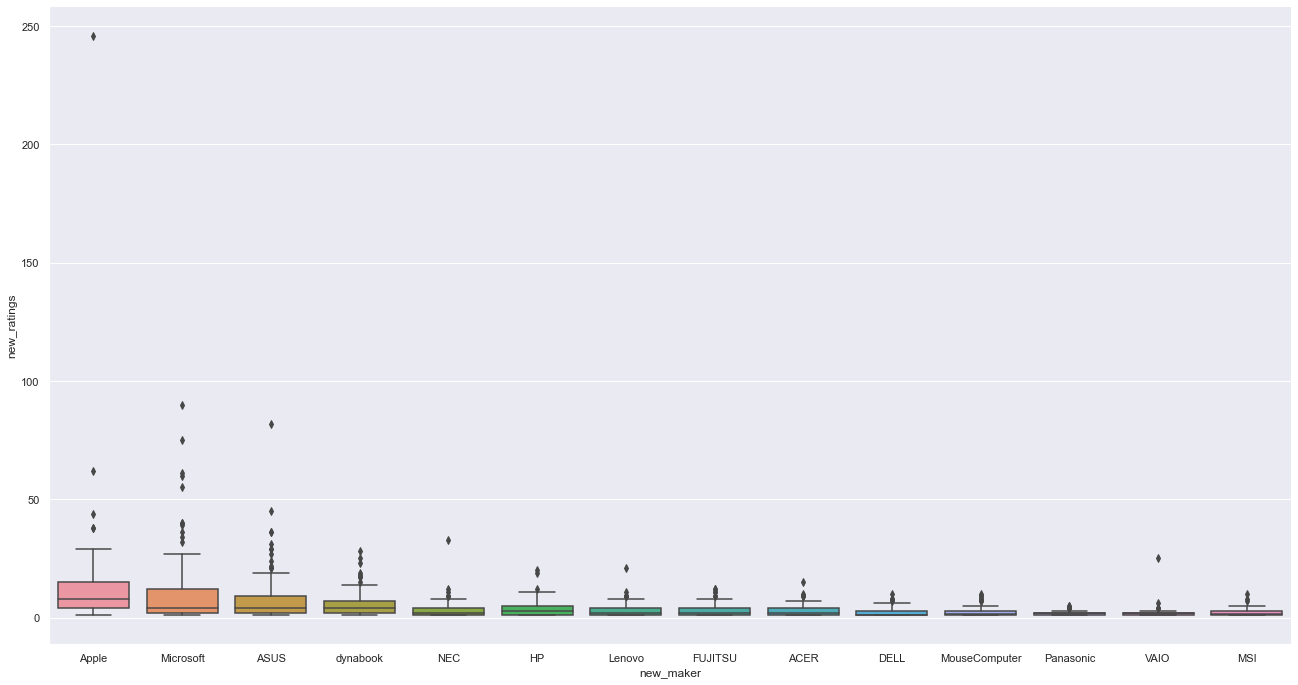

In [82]:
g = sns.catplot(
    data=df[(df.new_maker.str.contains(makers))&(df.new_ratings > 0)].sort_values("new_ratingssum", ascending=False),
    x="new_maker",
    y="new_ratings",
    kind="box"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



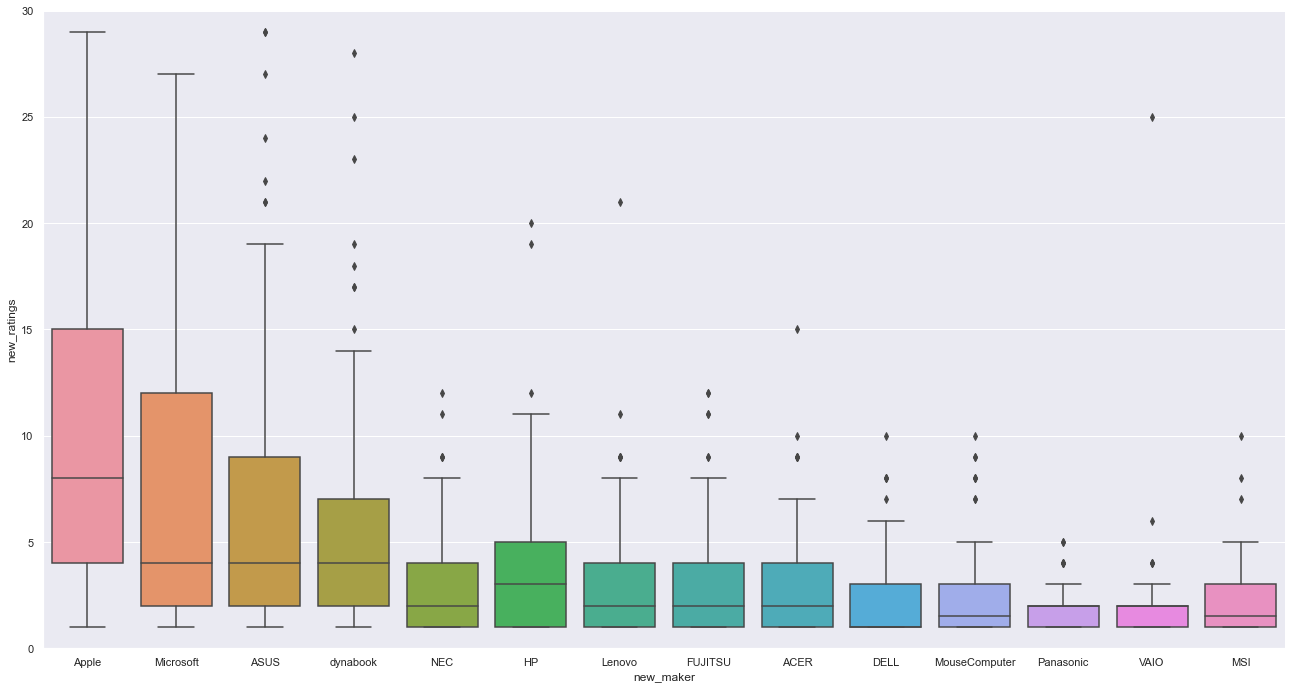

In [80]:
g = sns.catplot(
    data=df[(df.new_maker.str.contains(makers))&(df.new_ratings > 0)].sort_values("new_ratingssum", ascending=False),
    x="new_maker",
    y="new_ratings",
    kind="box"
).set(ylim=(0, 30))
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



In [84]:
df[df.new_ratings == 25].title[1712]

'VJF15690511W ノートパソコン Fit15E mk3 ホワイト [15.5型 /intel Celeron /HDD：500GB /メモリ：4GB /2017年2月モデル]'

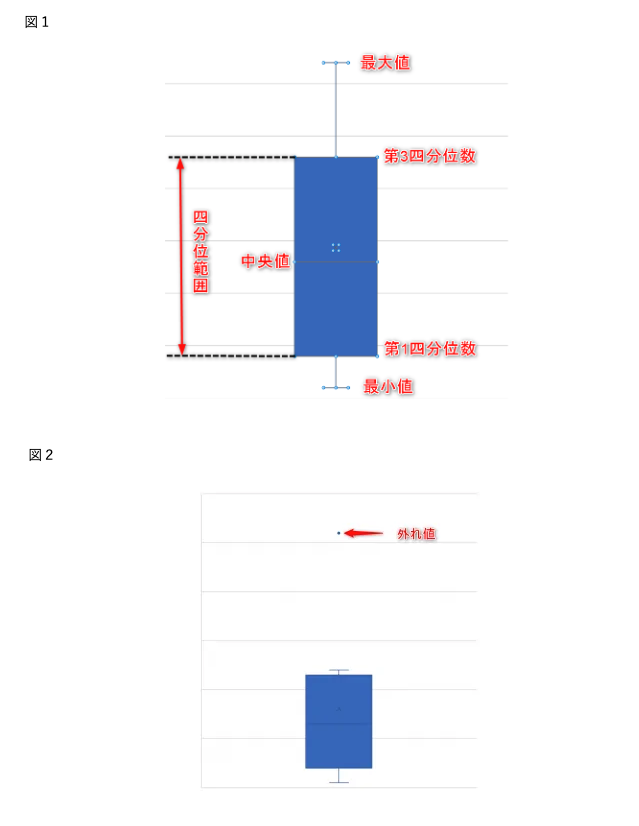

In [81]:
from IPython.display import Image, display_png
display_png(Image("./hako.png"))



## new_ratings

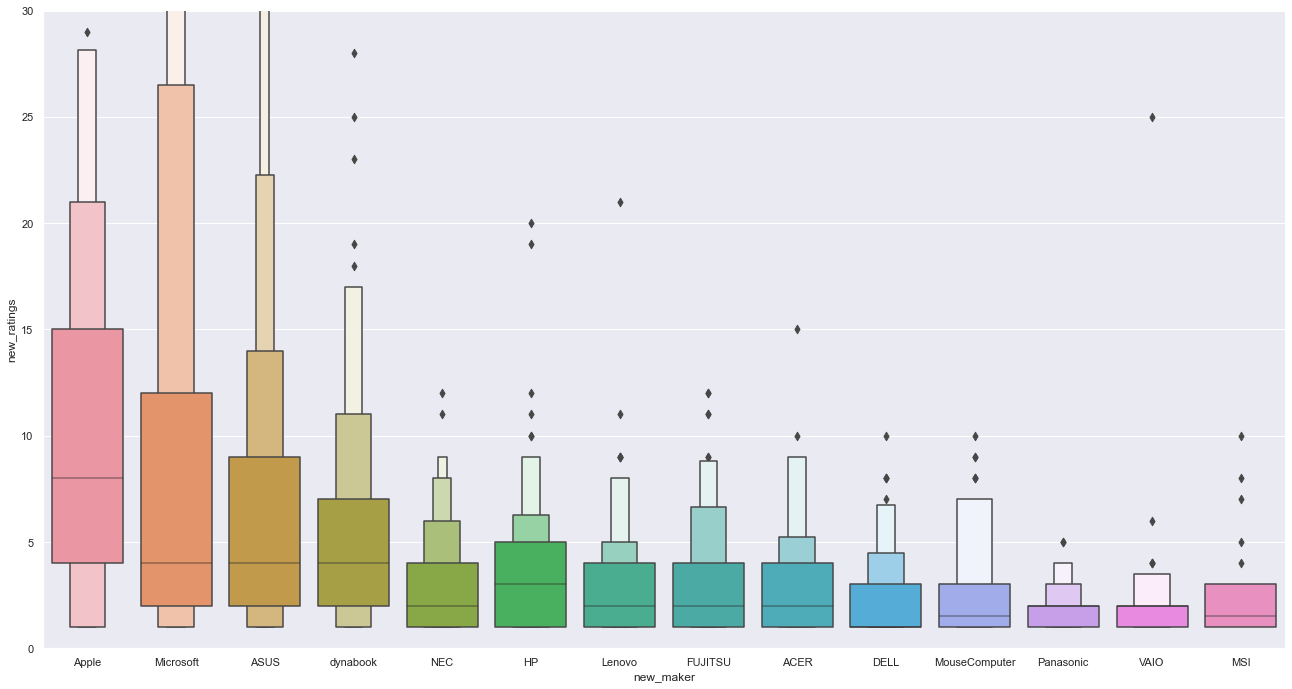

In [85]:
g = sns.catplot(
    data=df[(df.new_maker.str.contains(makers))&(df.new_ratings > 0)].sort_values("new_ratingssum", ascending=False),
    x="new_maker",
    y="new_ratings",
    kind="boxen"
).set(ylim=(0, 30))
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



## new_price

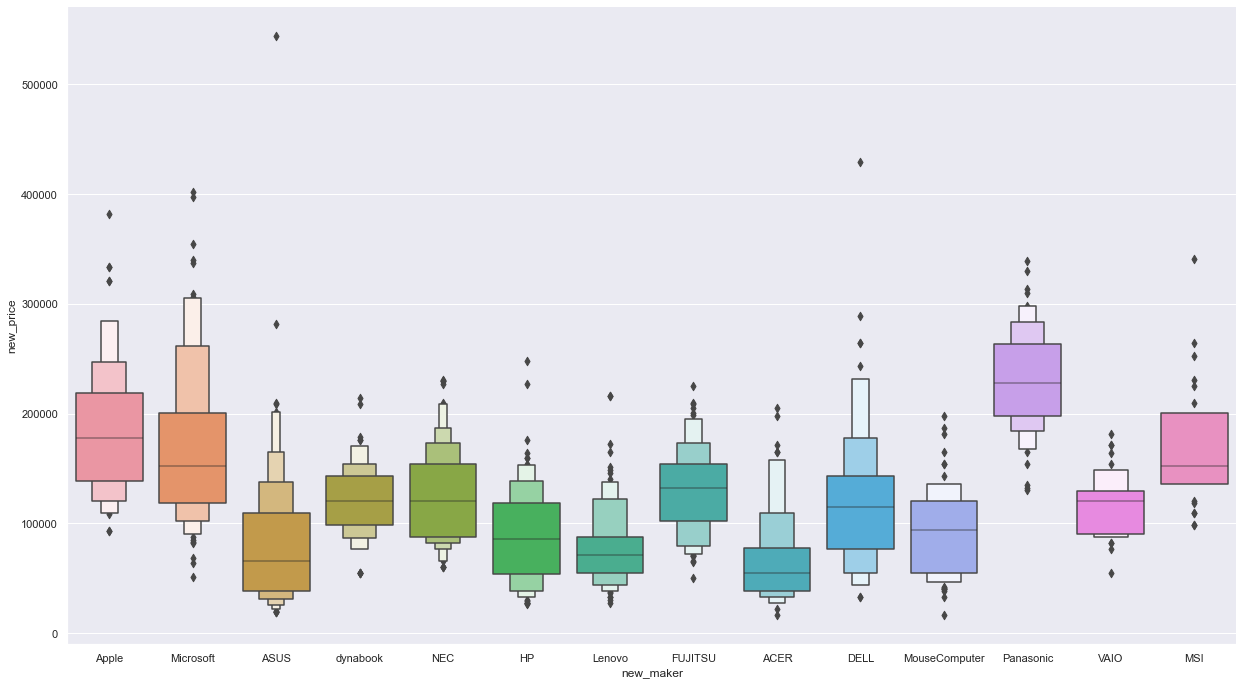

In [88]:
g = sns.catplot(
    data=df[(df.new_maker.str.contains(makers))&(df.new_ratings > 0)].sort_values("new_ratingssum", ascending=False),
    x="new_maker",
    y="new_price",
    kind="boxen"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



## new_point

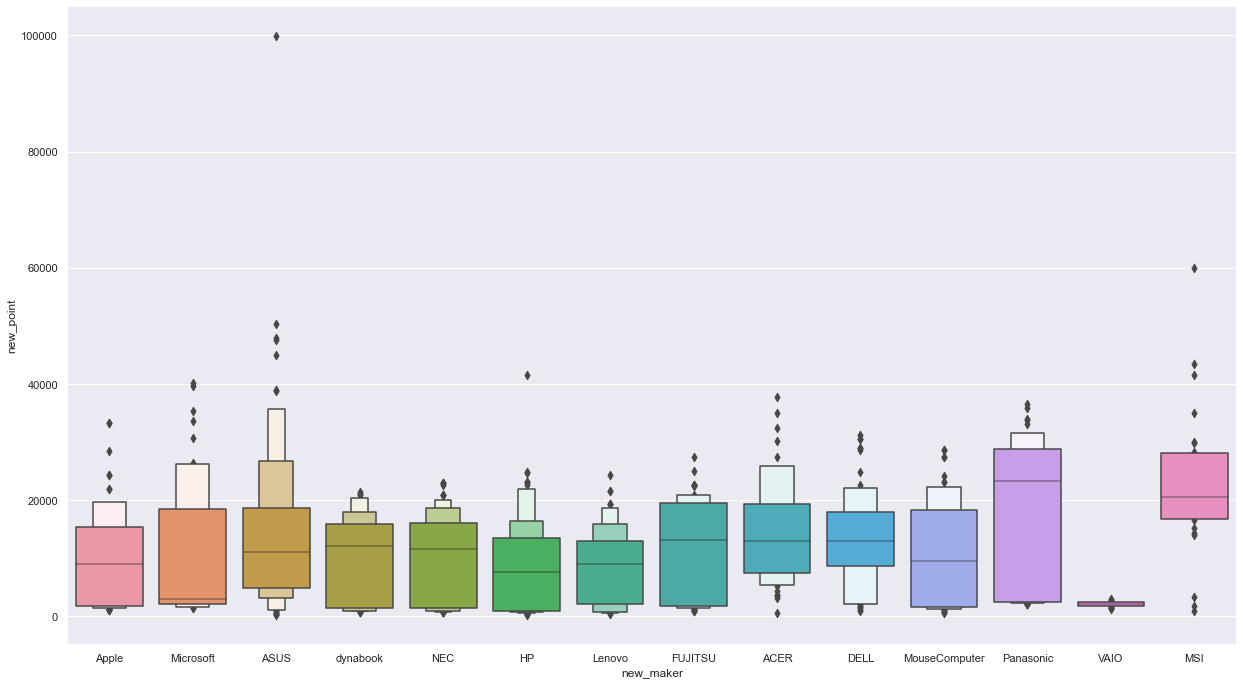

In [89]:
g = sns.catplot(
    data=df[(df.new_maker.str.contains(makers))&(df.new_point > 0)].sort_values("new_ratingssum", ascending=False),
    x="new_maker",
    y="new_point",
    kind="boxen"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



## string_len

In [91]:
# タイトル作成の丁寧さはどこか？

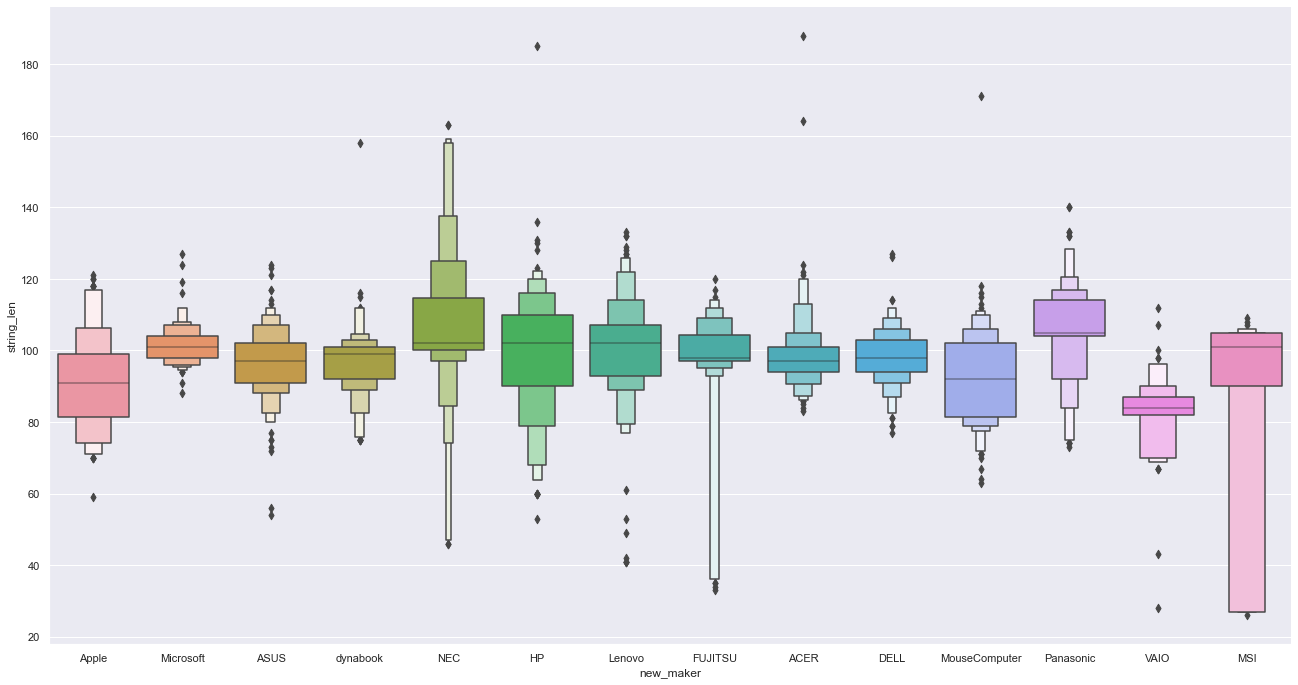

In [90]:
g = sns.catplot(
    data=df[df.new_maker.str.contains(makers)].sort_values("new_ratingssum", ascending=False),
    x="new_maker",
    y="string_len",
    kind="boxen"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



## words_len

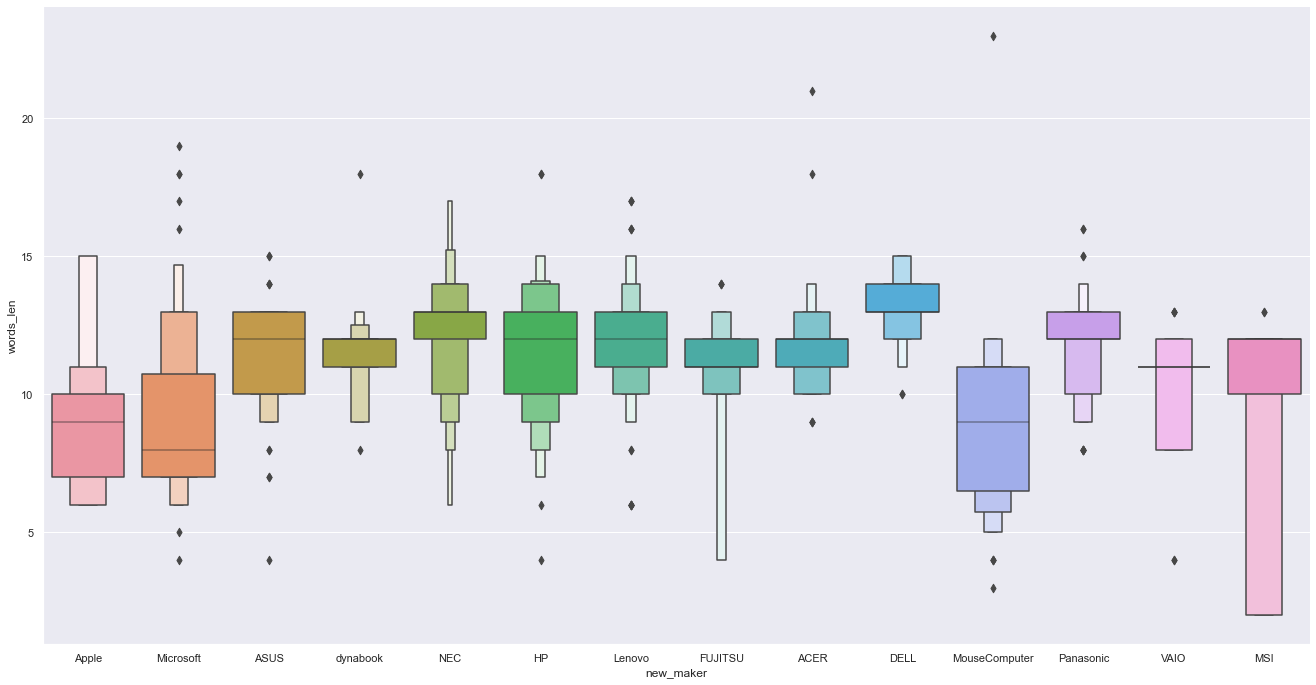

In [92]:
g = sns.catplot(
    data=df[df.new_maker.str.contains(makers)].sort_values("new_ratingssum", ascending=False),
    x="new_maker",
    y="words_len",
    kind="boxen"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



## int_inch

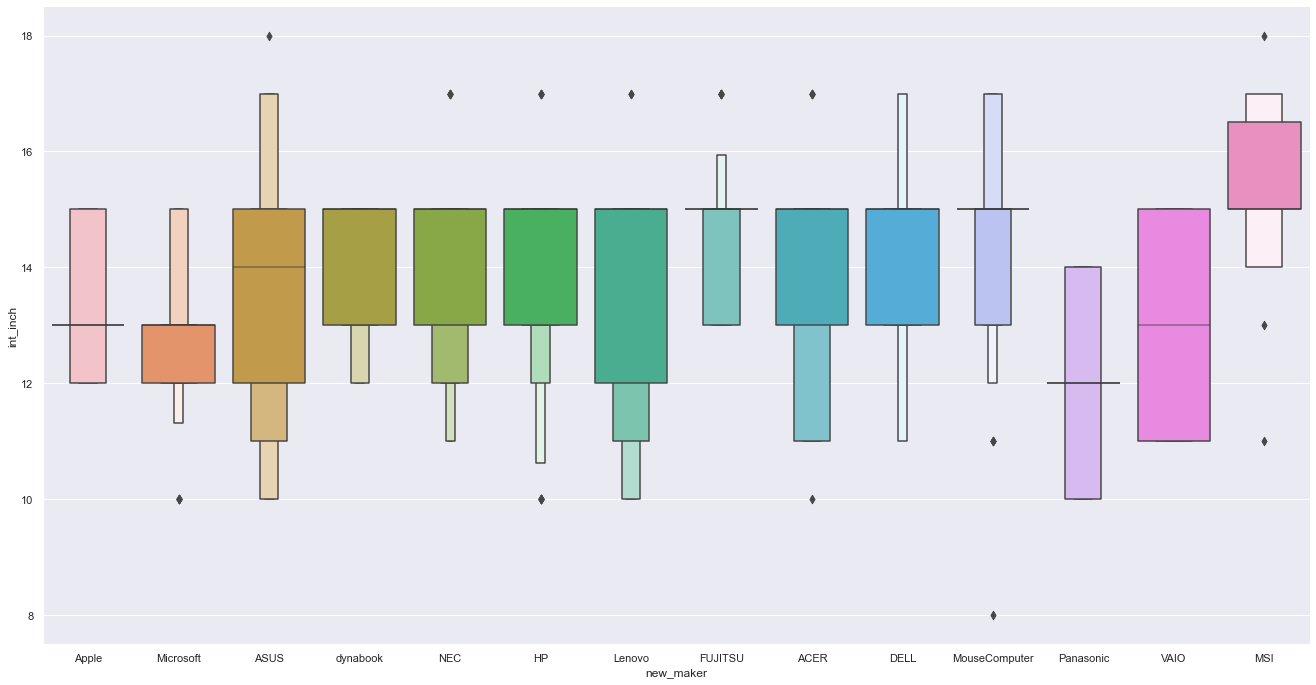

In [94]:
g = sns.catplot(
    data=df[(df.new_maker.str.contains(makers))&(df.int_inch > 0)].sort_values("new_ratingssum", ascending=False),
    x="new_maker",
    y="int_inch",
    kind="boxen"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



In [97]:
df[df.new_maker == "MSI"].sort_values("new_price", ascending=False)

,item_url,title,picture,maker,price,point,stock,ratings,terms,spec_list,...,new_price,new_point,new_ratings,string_len,words_len,new_ratingssum,new_ratingsmean,new_ratingsmedian,new_ratingscount,new_ratingsmax
2082,https://www.biccamera.com/bc/item/7019456/,GT76 Titan ゲーミングノートパソコン GT76-9SG-057JP [17.3型 ...,https://image.biccamera.com/img/00000007019456...,MSI エムエスアイ,"599,180円（税込）","59,918ポイント\n （10％）",在庫あり,0,no ship info,"['HDD1TB', 'メモリ32GB', '17.3型', 'intelCorei9', ...",...,599180,59918,0,103,12,63,0.863014,0.0,73,10
2135,https://www.biccamera.com/bc/item/3593455/,GT83VR-7RF-001JP ゲーミングノートパソコン GTシリーズ ブラック [18....,https://image.biccamera.com/img/00000003593455...,MSI エムエスアイ,"592,900円（税込）",0,予定数の販売を終了しました,0,no ship info,"['HDD1TB', 'メモリ32GB', 'SSD256GB', '2017年1月モデル'...",...,592900,0,0,106,12,63,0.863014,0.0,73,10
2091,https://www.biccamera.com/bc/item/6701629/,ゲーミングノートパソコン GS75-9SG-400JP,https://image.biccamera.com/img/00000006701629...,MSI エムエスアイ,"434,800円（税込）","43,480ポイント\n （10％）",在庫あり,0,2019年11月4日月曜日にお届け,[],...,434800,43480,0,27,2,63,0.863014,0.0,73,10
2097,https://www.biccamera.com/bc/item/6701627/,ゲーミングノートパソコン GE75-9SG-438JP,https://image.biccamera.com/img/00000006701627...,MSI エムエスアイ,"414,800円（税込）","41,480ポイント\n （10％）",在庫あり,0,2019年11月4日月曜日にお届け,[],...,414800,41480,0,27,2,63,0.863014,0.0,73,10
2107,https://www.biccamera.com/bc/item/4917031/,GT75-8RG-008JP ゲーミングノートパソコン GTシリーズ ブラック [17.3型...,https://image.biccamera.com/img/00000004917031...,MSI エムエスアイ,"401,280円（税込）",0,販売を終了しました（生産完了）,0,no ship info,"['HDD1TB', 'SSD256GB', '2018年4月モデル', 'メモリ16GB'...",...,401280,0,0,104,12,63,0.863014,0.0,73,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,https://www.biccamera.com/bc/item/3581424/,GE62-6QD-091JP ゲーミングノートパソコン GEシリーズ ブラック [15.6型...,https://image.biccamera.com/img/00000003581424...,MSI エムエスアイ,"98,780円（税込）",0,予定数の販売を終了しました,0,no ship info,"['HDD1TB', 'SSD128GB', '15.6型', '2016年12月モデル',...",...,98780,0,0,104,12,63,0.863014,0.0,73,10
2103,https://www.biccamera.com/bc/item/5102417/,GL638RC1060JP ゲーミングノートパソコン GLシリーズ ブラック [15.6型 ...,https://image.biccamera.com/img/00000005102417...,MSI エムエスアイ,"98,780円（税込）",0,販売を終了しました（生産完了）,(5)\n,no ship info,"['SSD256GB', '15.6型', 'メモリ16GB', '2018年5月モデル',...",...,98780,0,5,94,11,63,0.863014,0.0,73,10
2075,https://www.biccamera.com/bc/item/6222723/,GFシリーズ ゲーミングノートパソコン ブラック GF63-8RC-476JP [15.6型...,https://image.biccamera.com/img/00000006222723...,MSI エムエスアイ,"98,700円（税込）",987ポイント\n,在庫あり,(2)\n,no ship info,"['HDD1TB', 'SSD128GB', '15.6型', '2019年01月モデル',...",...,98700,987,2,104,12,63,0.863014,0.0,73,10
2137,https://www.biccamera.com/bc/item/2059656/,U270-412JP ノートパソコン X-SLIM ブラック [11.6型 /AMD Eシリ...,https://image.biccamera.com/img/00000002059656...,MSI エムエスアイ,"49,029円（税込）",0,予定数の販売を終了しました,0,no ship info,"['2012年5月モデル', 'メモリ2GB', 'SO-DIMM(空きスロット1)', '...",...,49029,0,0,100,11,63,0.863014,0.0,73,10


## count

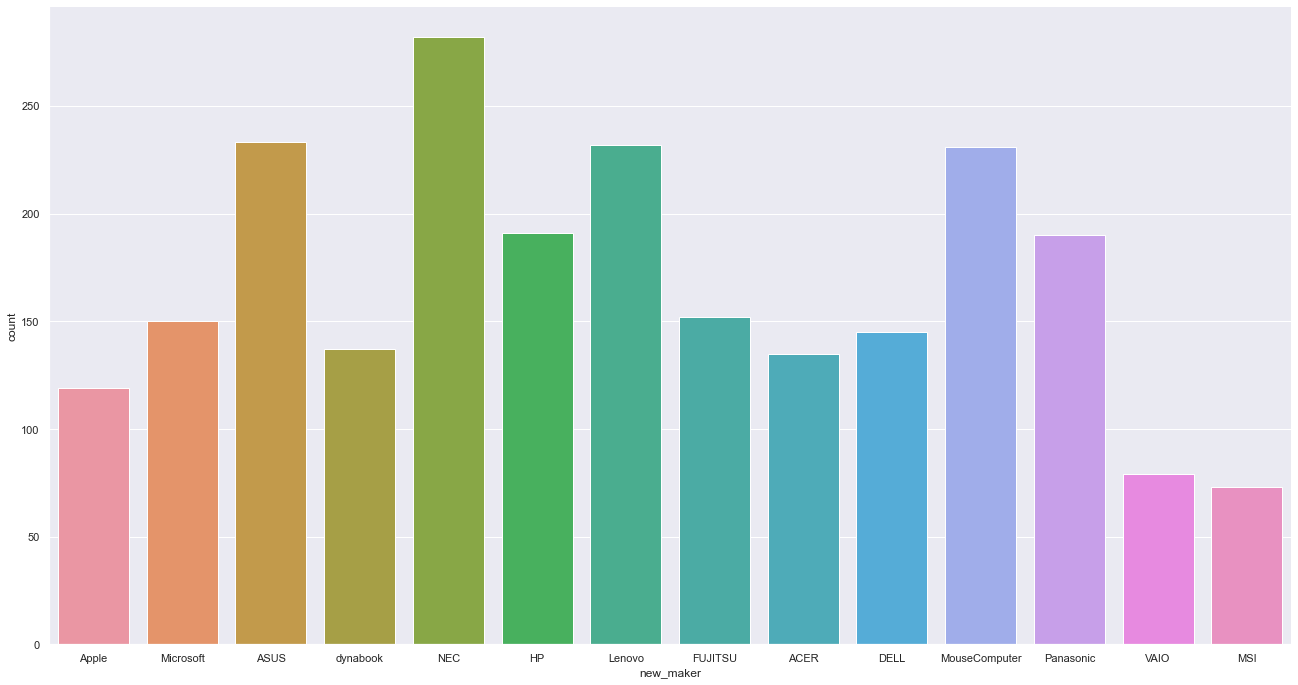

In [96]:
g = sns.catplot(
    data=df[df.new_maker.str.contains(makers)].sort_values("new_ratingssum", ascending=False),
    x="new_maker",
    kind="count"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



## intel_cpu

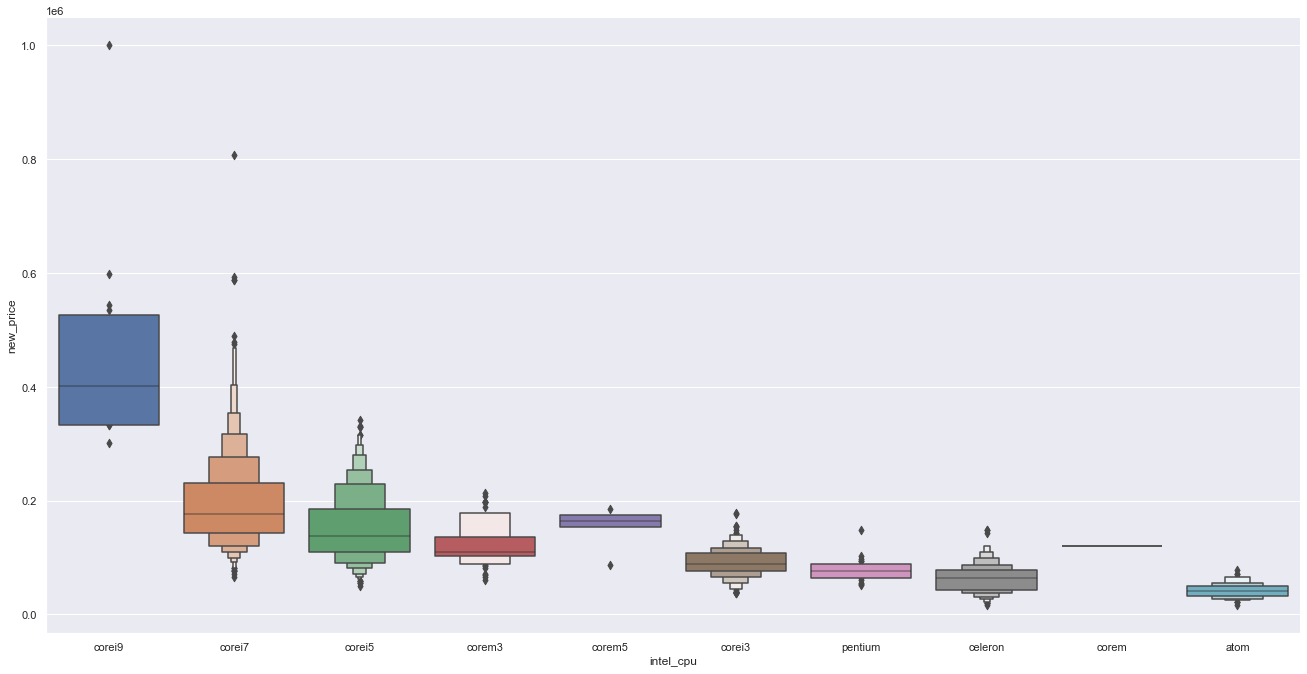

In [98]:
g = sns.catplot(
    data=df[df.intel_cpu != "0"].sort_values("new_price", ascending=False),
    x="intel_cpu",
    y="new_price",
    kind="boxen"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



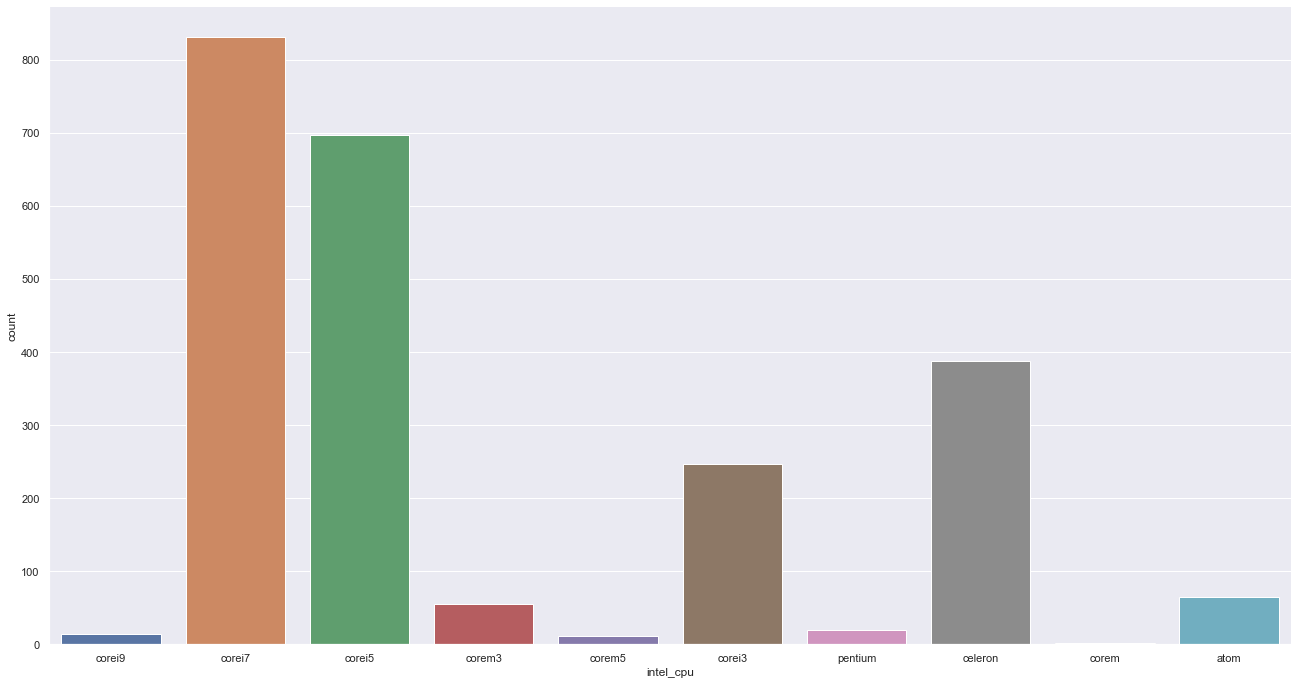

In [100]:
g = sns.catplot(
    data=df[df.intel_cpu != "0"].sort_values("new_price", ascending=False),
    x="intel_cpu",
    kind="count"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



## amd_cpu

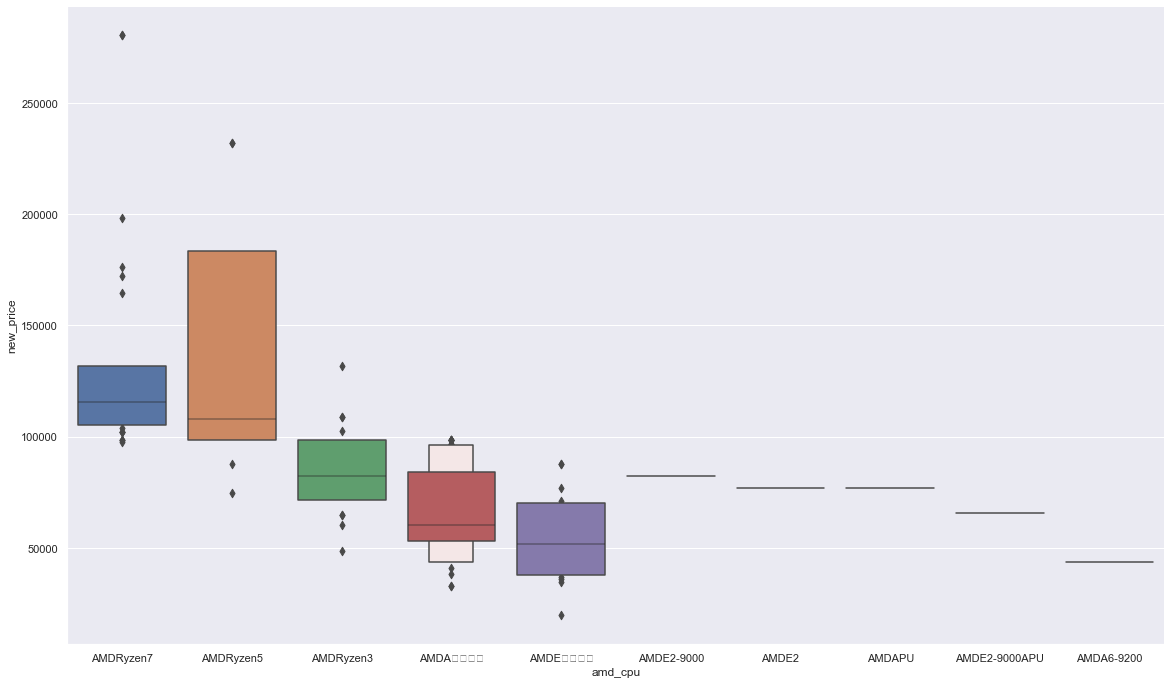

In [104]:
g = sns.catplot(
    data=df[df.amd_cpu != "0"].sort_values("new_price", ascending=False),
    x="amd_cpu",
    y="new_price",
    kind="boxen"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



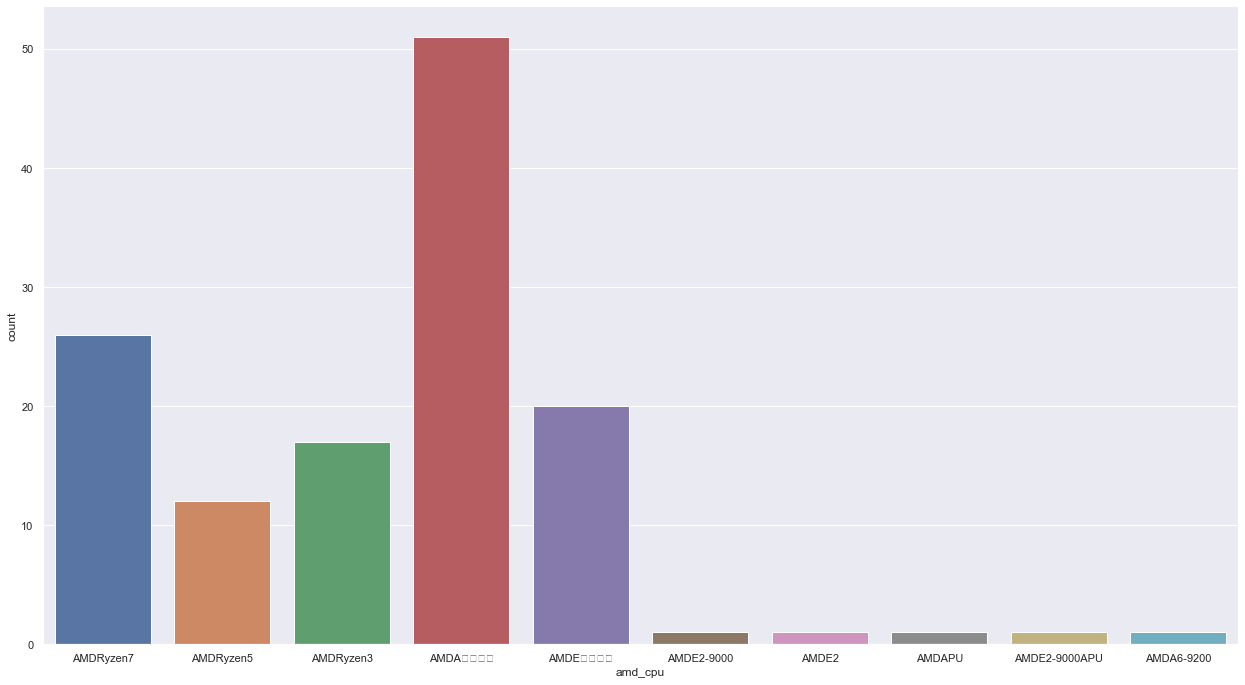

In [105]:
g = sns.catplot(
    data=df[df.amd_cpu != "0"].sort_values("new_price", ascending=False),
    x="amd_cpu",
    kind="count"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)



## memory

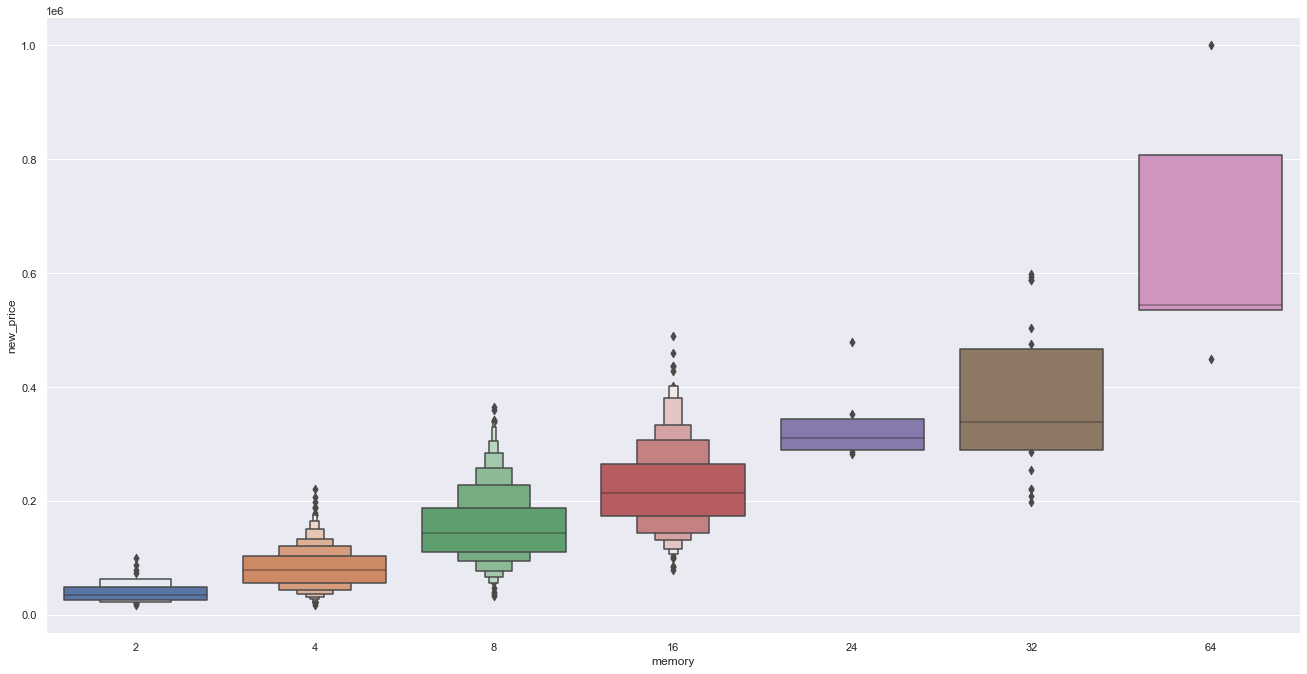

In [102]:
g = sns.catplot(
    data=df[df.memory != 0].sort_values("new_price", ascending=False),
    x="memory",
    y="new_price",
    kind="boxen"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)




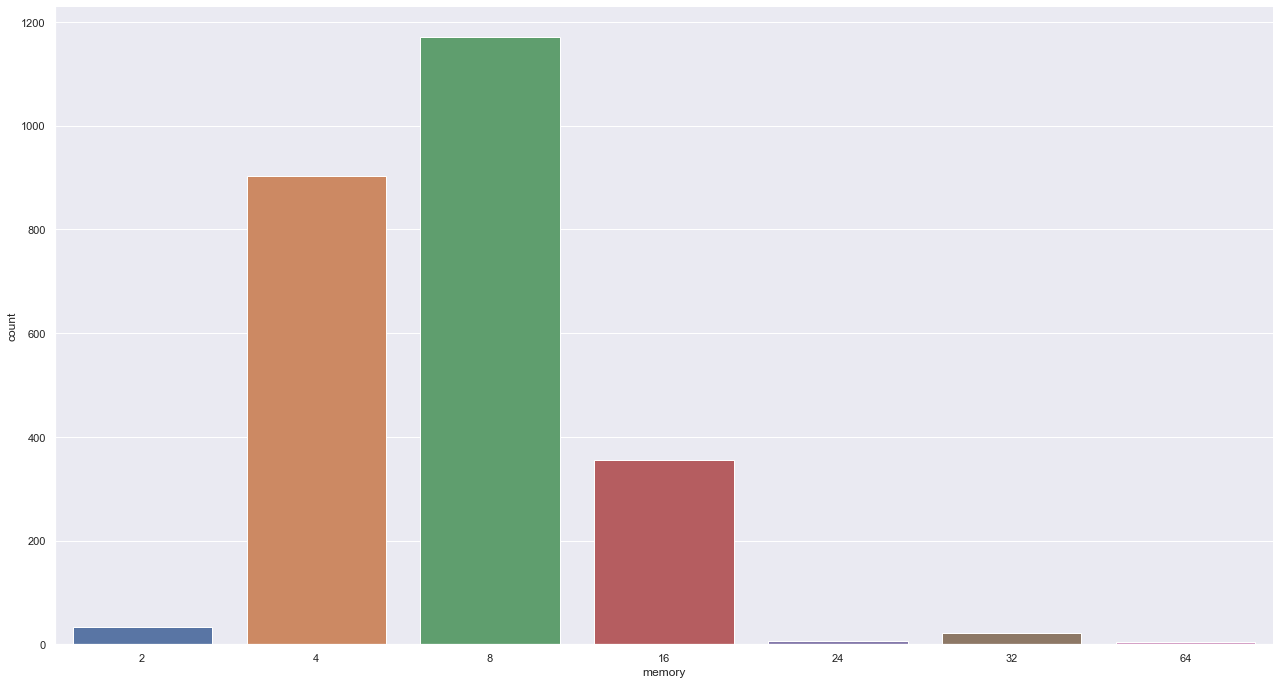

In [103]:
g = sns.catplot(
    data=df[df.memory != 0].sort_values("new_price", ascending=False),
    x="memory",
    kind="count"
)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)





In [ ]:
# どのメーカーが人気なのか？ 
# Apple

# メーカーによって販売している価格帯は異なるか？ 
# Yes　国産、海外メーカーによって特徴が異なった。　
# またLets noteを販売しているpanasonicは中央値の価格帯が一番高い。

# タイトル作成の丁寧さはどこか？  
# NEC panasonicが文字数でいうと多いので、丁寧だと思われる。

# cpuの違いでどのような差があるのか？
# intel i9 > i7 > i5 > i3のように価格が下がっていく
# 価格が下がるとスペックも下がっていく
# AMD cpu
# AMDRyzen7 > 5  >3のように価格が下がっていく
# 価格はintel同様

# pcの大きさは各メーカー異なるか？
# inch 12 ~ 15 でほとんどまとまっている
# ただ、MSIだけは15 ~ 18の大型PCがメインである
